In [1]:
import sys
sys.path.insert(0, '/Users/lunderman/Documents/GitHub/LMP19')
import LMP19
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF,WhiteKernel

In [4]:
gamma = [-1,-1]
func = LMP19.Models.FuQu(gamma).eval

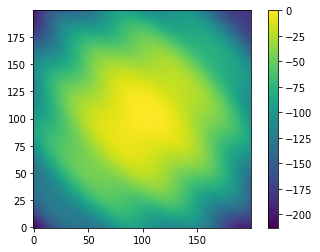

In [5]:
lb , ub = [-10,-10],[10,10]
bounds = np.array([lb,ub]).T
dt = 0.1

xx_mesh = np.meshgrid(np.arange(lb[0],ub[0],dt),np.arange(lb[1],ub[1],dt))
xx = np.vstack([xx_mesh[0].ravel(), xx_mesh[1].ravel()])
yy = func(xx).reshape((200,200))

plt.imshow(yy,origin='lower')
plt.colorbar()
plt.show()

In [6]:
nPts = 10
X = np.random.uniform(lb,ub,(nPts,2))
y = func(X).reshape((nPts,1))

In [7]:
GBO = LMP19.GBO(func,2,X,y,bounds)

kernel = 1.0**2*RBF(np.max(np.diag(np.cov(X.T))))+1.0**2*WhiteKernel(np.std(y))
GP = GPR(kernel = kernel,normalize_y=False,n_restarts_optimizer=50).fit(X,y)

In [10]:
X.shape

(10, 2)

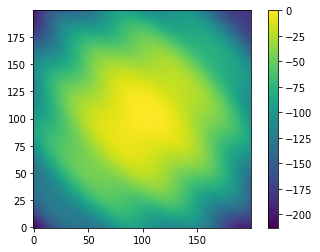

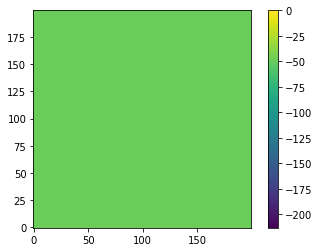

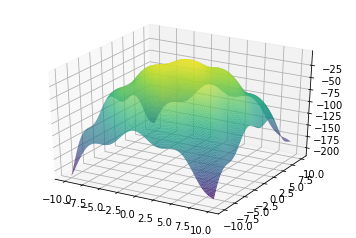

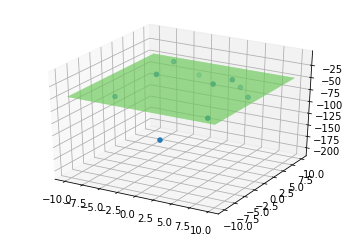

In [11]:
Y = GP.predict(xx.T).reshape((200,200))

vmin ,vmax = np.min(yy),np.max(yy)
plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()
plt.imshow(Y,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()

ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], yy, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
plt.show()
ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
ax.set_zlim(vmin,vmax)
ax.scatter3D(X[:,0],X[:,1],y)
plt.show()

In [12]:
nSteps = 20
for kk in range(nSteps):
    GBO.GP = GP
    GBO.Expected_Improvement()
    if kk%10 ==0:
        print('=============================================')
        print('=============================================')
        print('Step ',kk)
        print('      Selected EI Maximizer: ',GBO.X[-1,:],-GBO.EI(GBO.X[-1,:]))
        print(' Current function maximizer: ',GBO.X[np.argmax(GBO.y),:],np.max(GBO.y))

Step  0
      Selected EI Maximizer:  [-0.16427459 -0.2571628 ] 4.4219930487658905
 Current function maximizer:  [-0.16427459 -0.2571628 ] -0.25978394854281506


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.01171875, -0.06868418,  0.25218119,  0.25218119]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 83, 'nit': 16, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.12890625, -0.24315643,  0.25160412,  0.25160412]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 64, 'nit': 10, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.03515625, -0.04711614,  0.25160412,  0.25160412]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 10, 'warnflag': 2}


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00193202,  0.10967018,  0.25570062,  0.25570062]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 148, 'nit': 22, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  4.33908825, -13.44486965,   0.3904828 ,   0.3904828 ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 14, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.06634402,  0.10840967,  0.25218181,  0.25218181]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 19, 'warnflag'

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.01733659, -0.08085159,  0.50398684,  0.50398684]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 77, 'nit': 12, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  2.78620999, -12.36425144,   0.49814856,   0.49814856]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 95, 'nit': 15, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00788205, -0.00916148,  0.50284975,  0.50284975]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 84, 'nit': 14, 'warnflag':

Step  10
      Selected EI Maximizer:  [-4.00671757 -0.46878186] 1.6792880325403678
 Current function maximizer:  [-0.05166773 -0.21133434] -0.12079024032170908


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00510624, -0.00432312,  0.51238473,  0.51238473]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 20, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.01171451, 0.14078486, 0.51396516, 0.51396516]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 20, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.39307701,  1.62396698,  0.51560058,  0.51560058]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 80, 'nit': 15, 'warnflag': 2}
  " 

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.41255397, -0.17070561,  0.50153856,  0.50153856]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 74, 'nit': 10, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.01918145, -0.10258161,  0.50311717,  0.50311717]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 131, 'nit': 24, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -0.59475525, -11.47998745,   0.75748638,   0.75748638]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 7, 'warnflag':

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00242053, -0.02007145,  0.50138905,  0.50138905]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 136, 'nit': 21, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.02252387, 0.23872078, 0.50119107, 0.50119107]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 93, 'nit': 17, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.02056823, 0.05811167, 0.50157614, 0.50157614]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 19, 'warnflag': 2}
  " sta

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.61543901e-04, -1.38287487e-02,  5.00483094e-01,  5.00483094e-01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 138, 'nit': 19, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.02031747,  0.13617561,  0.50180313,  0.50180313]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 107, 'nit': 28, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.61372858e-03, -4.29809504e-04,  5.00673402e-01,  5.00673402e-01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcall

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.41292587e-03,  1.62499868e-07,  5.01542483e-01,  5.01542483e-01]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 127, 'nit': 27, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  0.36950026, -13.08674375,   0.50034959,   0.50034959]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 82, 'nit': 17, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ -9.40317364, -18.68875427,   0.96728363,   0.96728363]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, '

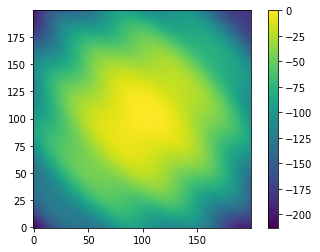

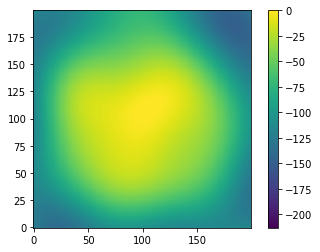

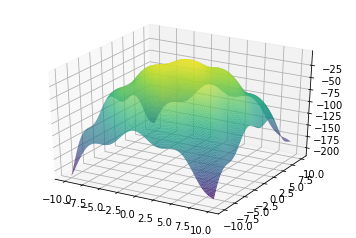

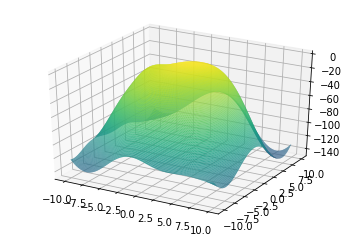

In [13]:
Y = GP.predict(xx.T).reshape((200,200))

vmin ,vmax = np.min(yy),np.max(yy)
plt.imshow(yy,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()
plt.imshow(Y,origin='lower',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.show()

ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], yy, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
plt.show()
ax = plt.axes(projection='3d')
ax.plot_surface(xx_mesh[0], xx_mesh[1], Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',vmin=vmin,vmax=vmax)
plt.show()

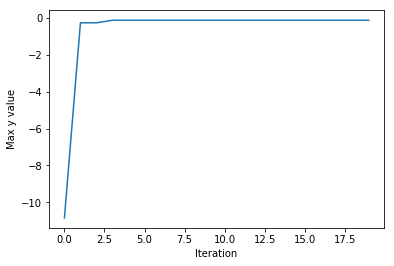

In [14]:
plt.plot(np.arange(nSteps),[np.max(GBO.y[:nPts+kk,0]) for kk in range(nSteps)])
plt.ylabel('Max y value')
plt.xlabel('Iteration')
plt.show()